In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from PSFDataset import MultiPSFDataset
from ClassifierModel import ClassifierModel

# CNN + FC

In [2]:
training_data = MultiPSFDataset.load('Pytorch Datasets/Cover Slip (A647 CF660c)/A647_vs_CF660c_all.pt')
real_data = MultiPSFDataset.load('Pytorch Datasets/Real Data (A647 CF660c)/A647_vs_CF660c_most_normal_single_movie.pt')

In [3]:
# you can try playing around with more or less training data
N_training_examples = 10000 # 100 examples per class
N_validation_examples = 2000 # 100 examples per class
random_seed = 2 # random seed for reproducibility
np.random.seed(random_seed)
all_train_indices = np.random.choice(np.arange(len(real_data)),
                               size=2*N_training_examples+N_validation_examples)
# Make two unique training/validation sets for change partway through training if desired
all_train_indices_1 = all_train_indices[:int(len(all_train_indices)/2)]
all_train_indices_2 = all_train_indices[int(len(all_train_indices)/2):]
training_indices_1 = all_train_indices_1[:N_training_examples]
validation_indices_1 = all_train_indices_1[N_training_examples:]
training_indices_2 = all_train_indices_2[:N_training_examples]
validation_indices_2 = all_train_indices_2[N_training_examples:]

In [4]:
# configuration parameters, you can play around with these
pooling = 'max' # 'max' or 'mean'

if pooling == 'max':
    pool_fcn = nn.AdaptiveMaxPool2d((1, 1))
else:
    pool_fcn = nn.AdaptiveAvgPool2d((1, 1))

# your model will have length(channel_widths)-1 layers
channel_widths = [1, 32, 64, 128] # must start with a 1 and be at least length--2
linear_sizes = [128, 32]
kernel = 3
model_14 = ClassifierModel(channel_widths, linear_sizes, kernel, pool_fcn)

In [15]:
config = {'lr': 1e-5,
          'n_epochs': 100,
          'batch_size': 128}
verbose = True # print metrics during training, False for no printing
model_14.train_model(real_data, training_indices_1, validation_indices_1, config)

Epoch 605/700: (Train) Loss = 5.9355e-01, Acc = 0.6878, (Val) Loss = 5.9900e-01, Acc = 0.6760
Epoch 610/700: (Train) Loss = 5.9411e-01, Acc = 0.6915, (Val) Loss = 6.0024e-01, Acc = 0.6750
Epoch 615/700: (Train) Loss = 5.9458e-01, Acc = 0.6907, (Val) Loss = 5.9858e-01, Acc = 0.6750
Epoch 620/700: (Train) Loss = 5.9299e-01, Acc = 0.6884, (Val) Loss = 5.9790e-01, Acc = 0.6830
Epoch 625/700: (Train) Loss = 5.9379e-01, Acc = 0.6890, (Val) Loss = 5.9958e-01, Acc = 0.6800
Epoch 630/700: (Train) Loss = 5.9396e-01, Acc = 0.6918, (Val) Loss = 5.9666e-01, Acc = 0.6770
Epoch 635/700: (Train) Loss = 5.9303e-01, Acc = 0.6923, (Val) Loss = 5.9775e-01, Acc = 0.6710
Epoch 640/700: (Train) Loss = 5.9220e-01, Acc = 0.6922, (Val) Loss = 5.9735e-01, Acc = 0.6770
Epoch 645/700: (Train) Loss = 5.9257e-01, Acc = 0.6939, (Val) Loss = 5.9771e-01, Acc = 0.6810
Epoch 650/700: (Train) Loss = 5.9121e-01, Acc = 0.6938, (Val) Loss = 5.9670e-01, Acc = 0.6800
Epoch 655/700: (Train) Loss = 5.9045e-01, Acc = 0.6932, (Val

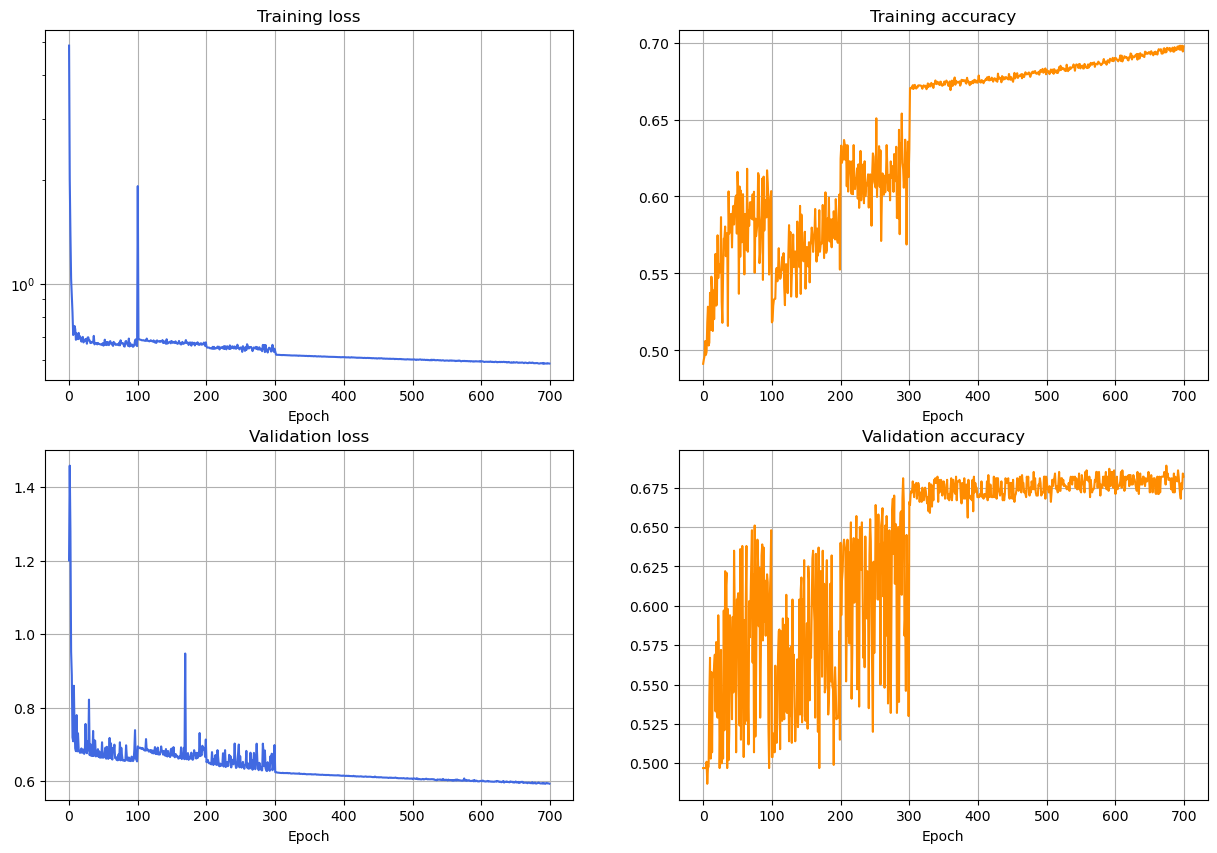

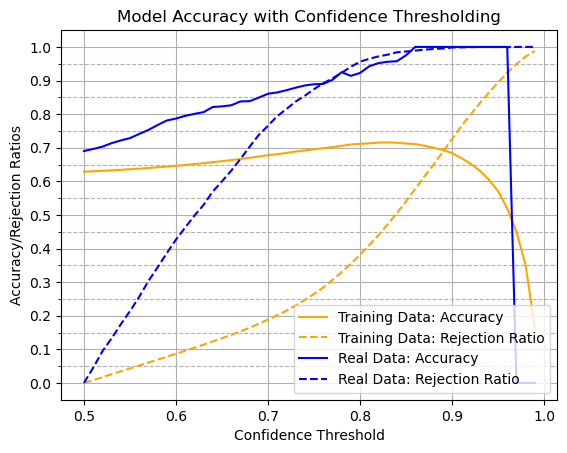

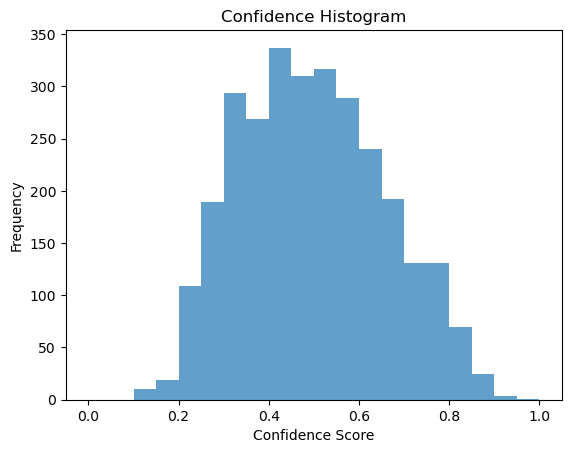

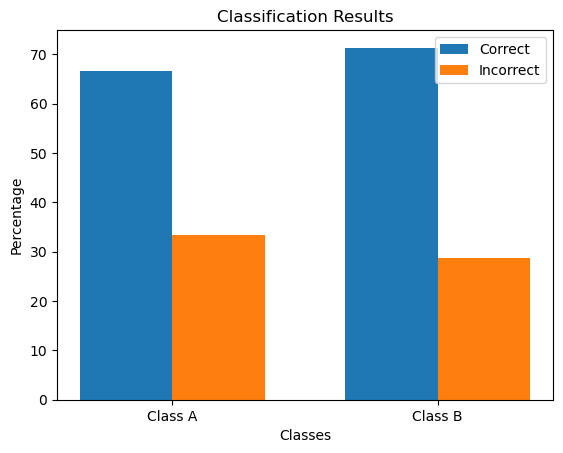

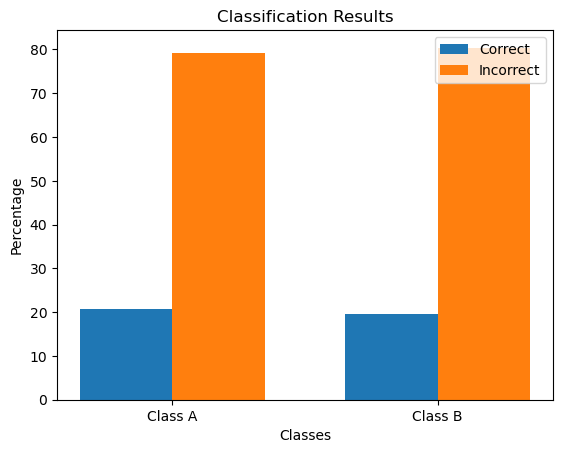

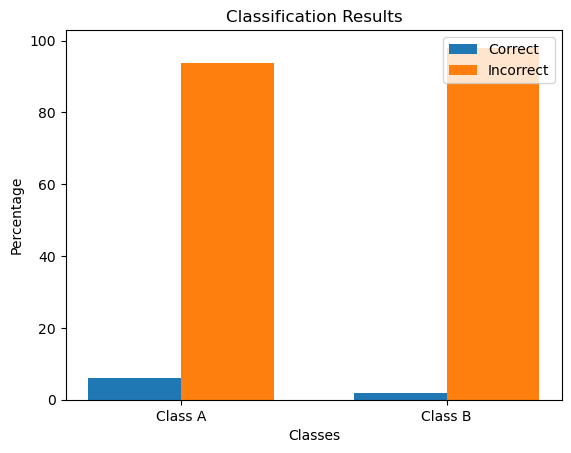

In [16]:
# plot training/validation loss and accuracy over training time
model_14.plot_model_results()
model_14.plot_confidence_thresholding([['Training Data', training_data], ['Real Data', real_data]], thresholds=np.arange(0.5, 1, 0.01))
model_14.confidence_histogram(real_data)
model_14.plot_classification_results(real_data)
model_14.plot_classification_results(real_data, confidence_threshold=0.7)
model_14.plot_classification_results(real_data, confidence_threshold=0.8)
